In [220]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import misc
from scipy import ndimage
import pickle
from sklearn import datasets
%matplotlib inline

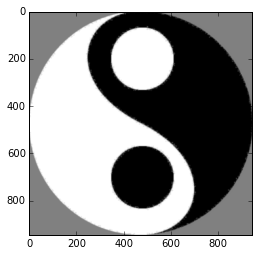

In [221]:
img = misc.imread('./yingyang.jpg')
img = np.mean(img, axis=2)
img = np.where(img==0, -1, img)
img = np.where(img==255, 1, img)
img = np.where(img>1, 0, img)
img = ndimage.gaussian_filter(img, sigma=2)
plt.imshow(img, cmap='gray')

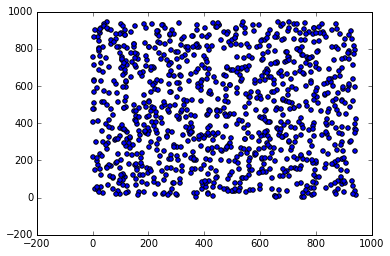

In [231]:
max_points = 1000

points = np.random.rand(max_points,2)*img.shape[0]
plt.scatter(points[:,0], points[:,1])

In [232]:
label = np.ones(points.shape[0])
for i, p in enumerate(points):
    label[i] = img[int(p[0]), int(p[1])]
    
epsilon = 10**-1
points = points[np.abs(label)>epsilon,:]
label = label[np.abs(label)>epsilon]
label = np.where(label > 0, 1, -1)

In [233]:
points /= img.shape[0]

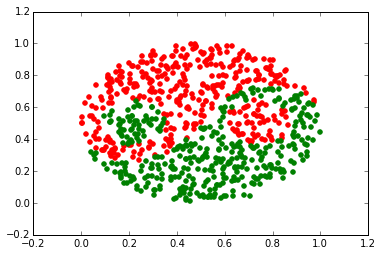

In [234]:
plt.scatter(points[label==-1, 0], points[label==-1, 1], color='red')
plt.scatter(points[label==1, 0], points[label==1, 1], color='green')

In [235]:
ds = datasets.base.Bunch()
ds.update({'data':points,'target':label})
pickle.dump(ds, open('yingyang.dat', 'wb'))

In [236]:
dataset = pickle.load(open('yingyang.dat', 'rb'))